In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths
base_dir = Path("~/airflow/dags/data").expanduser()
raw_dir = base_dir / "raw"
processed_dir = base_dir / "processed"
output_dir = base_dir / "outputs"

# Set visualization style
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Load historical weather data
historical = pd.read_csv(raw_dir / 'historical_weather.csv')
print("Historical Weather Data:")
display(historical.head())
print(f"\nShape: {historical.shape}")
print("\nMissing values:")
display(historical.isna().sum())

# Load current weather data
current = pd.read_csv(raw_dir / 'current_weather.csv')
print("\nCurrent Weather Data:")
display(current.head())
print(f"\nShape: {current.shape}")
print("\nMissing values:")
display(current.isna().sum())

# Load merged data
merged = pd.read_csv(processed_dir / 'merged_weather_data.csv')
print("\nMerged Weather Data:")
display(merged.head())
print(f"\nShape: {merged.shape}")
print("\nMissing values:")
display(merged.isna().sum())

# Load weather scores
scores = pd.read_csv(output_dir / 'monthly_weather_scores.csv')
print("\nWeather Scores Data:")
display(scores.head())
print(f"\nShape: {scores.shape}")
print("\nMissing values:")
display(scores.isna().sum())

Historical Weather Data:


,city,month,avg_temp,precipitation,wind_speed
0,Paris,1,10,50,10
1,Paris,2,12,55,11
2,Paris,3,14,60,12
3,Paris,4,16,65,13
4,Paris,5,18,70,14



Shape: (48, 5)

Missing values:


city             0
month            0
avg_temp         0
precipitation    0
wind_speed       0
dtype: int64


Current Weather Data:


,city,date,temp,precipitation,wind_speed,humidity
0,Paris,2025-06-20,30.04,0,3.61,31
1,London,2025-06-20,26.49,0,4.80,42
2,New York,2025-06-20,22.59,0,6.88,57
3,Tokyo,2025-06-20,24.36,0,4.44,76



Shape: (4, 6)

Missing values:


city             0
date             0
temp             0
precipitation    0
wind_speed       0
humidity         0
dtype: int64


Merged Weather Data:


,city,month,temp,precipitation,wind_speed,date,humidity
0,Paris,1,10.0,50,10.0,2023-01-01,NaN
1,Paris,2,12.0,55,11.0,2023-02-01,NaN
2,Paris,3,14.0,60,12.0,2023-03-01,NaN
3,Paris,4,16.0,65,13.0,2023-04-01,NaN
4,Paris,5,18.0,70,14.0,2023-05-01,NaN



Shape: (52, 7)

Missing values:


city              0
month             0
temp              0
precipitation     0
wind_speed        0
date              0
humidity         48
dtype: int64


Weather Scores Data:


,city,month,weather_score,temp,precipitation,wind_speed
0,London,1,0.250,10.0,50.0,10.0
1,London,2,0.225,12.0,55.0,11.0
2,London,3,0.200,14.0,60.0,12.0
3,London,4,0.225,16.0,65.0,13.0
4,London,5,0.300,18.0,70.0,14.0



Shape: (48, 6)

Missing values:


city             0
month            0
weather_score    0
temp             0
precipitation    0
wind_speed       0
dtype: int64

In [4]:
# Check data types
print("Historical data types:")
display(historical.dtypes)

print("\nCurrent data types:")
display(current.dtypes)

print("\nMerged data types:")
display(merged.dtypes)

print("\nScores data types:")
display(scores.dtypes)

# Check for duplicates
print("\nDuplicate rows in historical data:", historical.duplicated().sum())
print("Duplicate rows in current data:", current.duplicated().sum())
print("Duplicate rows in merged data:", merged.duplicated().sum())
print("Duplicate rows in scores data:", scores.duplicated().sum())

# Check unique values
print("\nUnique cities in historical data:", historical['city'].unique())
print("Unique months in historical data:", sorted(historical['month'].unique()))

Historical data types:


city             object
month             int64
avg_temp          int64
precipitation     int64
wind_speed        int64
dtype: object


Current data types:


city              object
date              object
temp             float64
precipitation      int64
wind_speed       float64
humidity           int64
dtype: object


Merged data types:


city              object
month              int64
temp             float64
precipitation      int64
wind_speed       float64
date              object
humidity         float64
dtype: object


Scores data types:


city              object
month              int64
weather_score    float64
temp             float64
precipitation    float64
wind_speed       float64
dtype: object


Duplicate rows in historical data: 0
Duplicate rows in current data: 0
Duplicate rows in merged data: 0
Duplicate rows in scores data: 0

Unique cities in historical data: ['Paris' 'London' 'New York' 'Tokyo']
Unique months in historical data: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]


In [5]:
# Historical data stats
print("Historical Data Statistics:")
display(historical.groupby('city').describe())

# Current data stats
print("\nCurrent Data Statistics:")
display(current.describe())

# Scores data stats
print("\nScores Data Statistics:")
display(scores.groupby('city').describe())

Historical Data Statistics:


month                                            avg_temp        ...  \
         count mean       std  min   25%  50%   75%   max    count  mean  ...   
city                                                                      ...   
London    12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0     12.0  21.0  ...   
New York  12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0     12.0  21.0  ...   
Paris     12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0     12.0  21.0  ...   
Tokyo     12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0     12.0  21.0  ...   

         precipitation        wind_speed                                     \
                   75%    max      count  mean       std   min    25%   50%   
city                                                                          
London           91.25  105.0       12.0  15.5  3.605551  10.0  12.75  15.5   
New York         91.25  105.0       12.0  15.5  3.605551  10.0  12.75  15.5   
Paris            91.25  105.0       12.0  15.5  3.605551  10.0  12.75  15.5   
Tokyo            91.25  105.0       12.0  15.5  3.605551  10.0  12.75  15.5   

                       
            75%   max  
city                   
London    18.25  21.0  
New York  18.25  21.0  
Paris     18.25  21.0  
Tokyo     18.25  21.0  

[4 rows x 32 columns]


Current Data Statistics:


,temp,precipitation,wind_speed,humidity
count,4.000000,4.0,4.000000,4.000000
mean,25.870000,0.0,4.932500,51.500000
std,3.204778,0.0,1.390668,19.502137
min,22.590000,0.0,3.610000,31.000000
25%,23.917500,0.0,4.232500,39.250000
50%,25.425000,0.0,4.620000,49.500000
75%,27.377500,0.0,5.320000,61.750000
max,30.040000,0.0,6.880000,76.000000



Scores Data Statistics:


month                                            weather_score  \
         count mean       std  min   25%  50%   75%   max         count   
city                                                                      
London    12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
New York  12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
Paris     12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
Tokyo     12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   

                    ... precipitation        wind_speed                       \
              mean  ...           75%    max      count       mean       std   
city                ...                                                        
London    0.339687  ...         91.25  105.0       12.0  15.075000  3.953623   
New York  0.336904  ...         91.25  105.0       12.0  15.161667  3.839626   
Paris     0.332787  ...         91.25  105.0       12.0  15.025417  4.027466   
Tokyo     0.341608  ...         91.25  105.0       12.0  15.060000  3.975324   

                                            
             min    25%   50%    75%   max  
city                                        
London     9.900  11.75  15.0  18.25  21.0  
New York  10.000  11.75  15.0  18.25  21.0  
Paris      9.305  11.75  15.0  18.25  21.0  
Tokyo      9.720  11.75  15.0  18.25  21.0  

[4 rows x 40 columns]

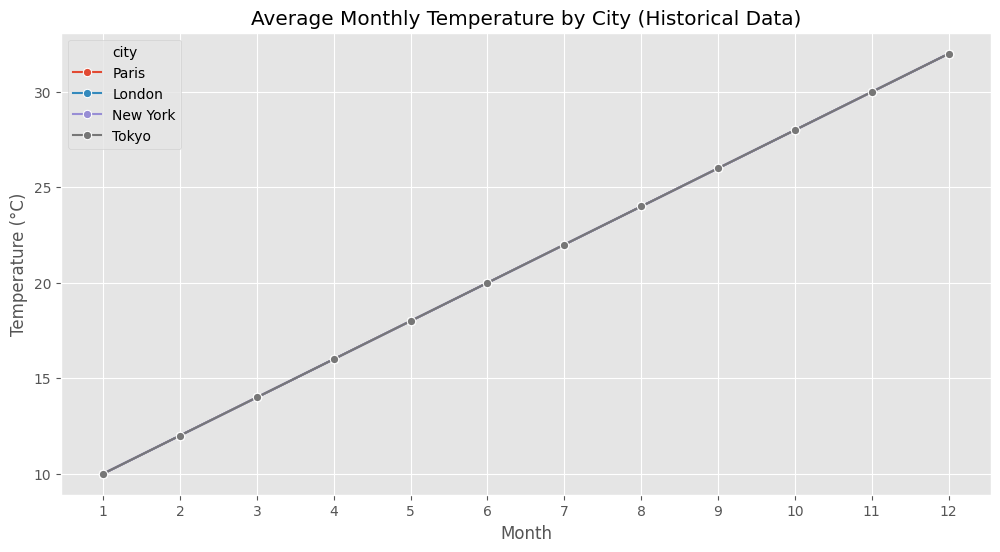

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical, x='month', y='avg_temp', hue='city', marker='o')
plt.title('Average Monthly Temperature by City (Historical Data)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

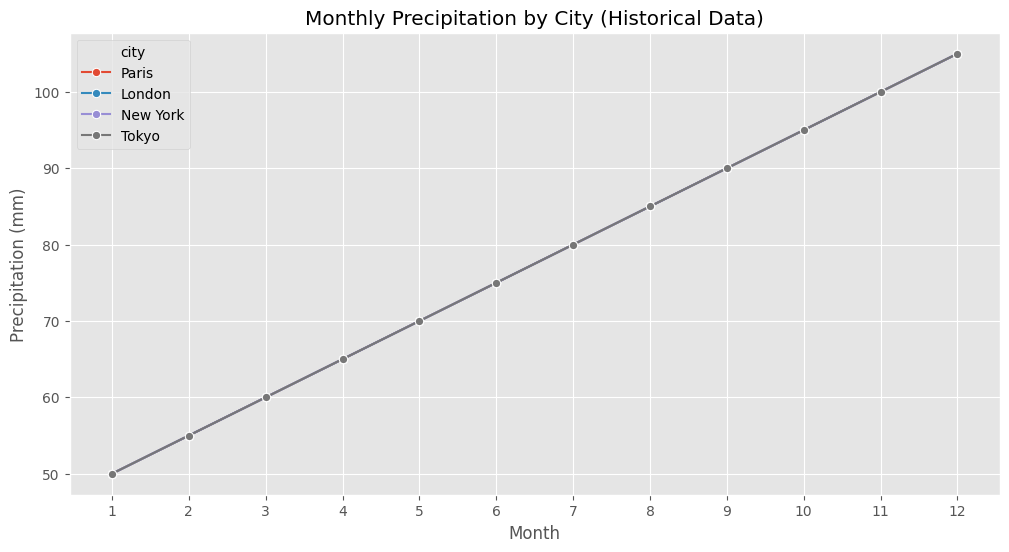

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical, x='month', y='precipitation', hue='city', marker='o')
plt.title('Monthly Precipitation by City (Historical Data)')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

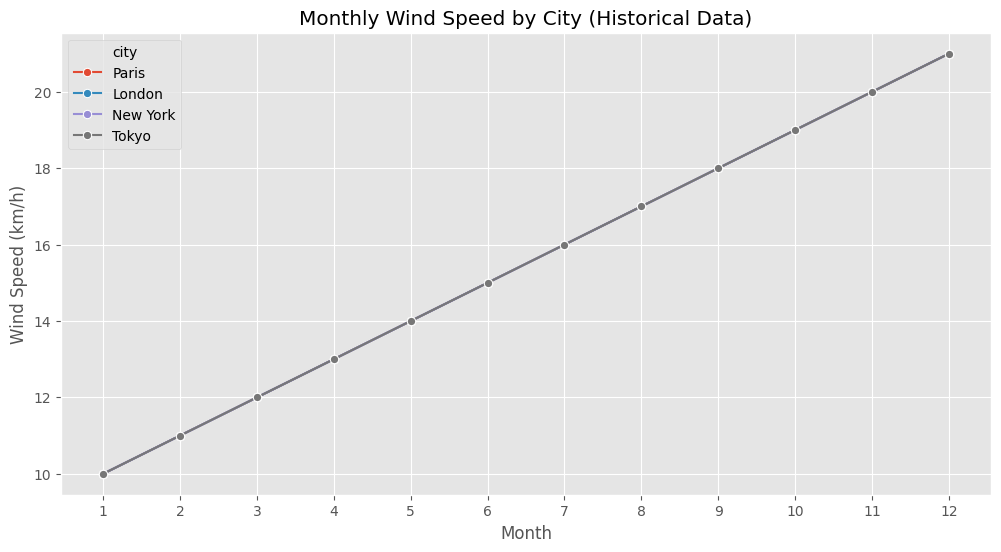

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical, x='month', y='wind_speed', hue='city', marker='o')
plt.title('Monthly Wind Speed by City (Historical Data)')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

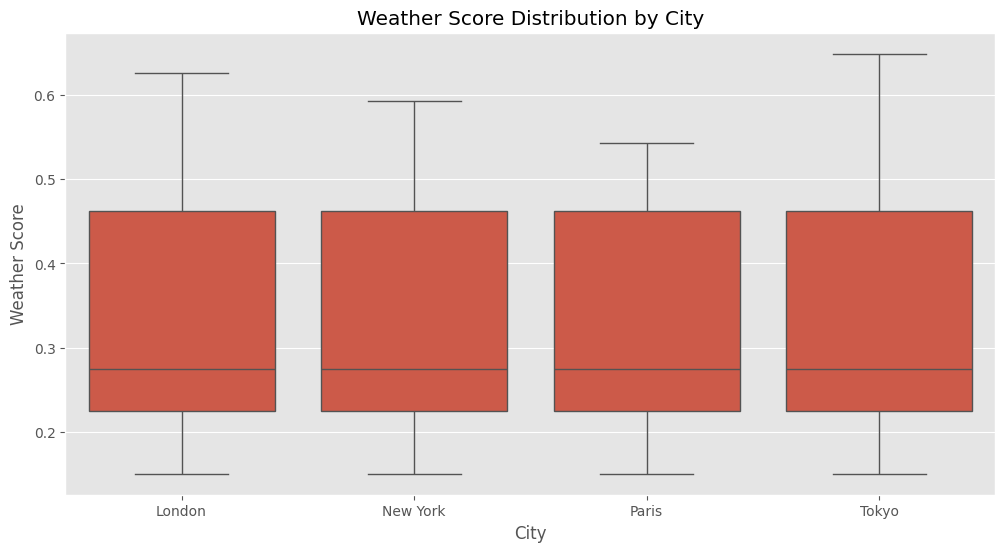

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=scores, x='city', y='weather_score')
plt.title('Weather Score Distribution by City')
plt.xlabel('City')
plt.ylabel('Weather Score')
plt.show()

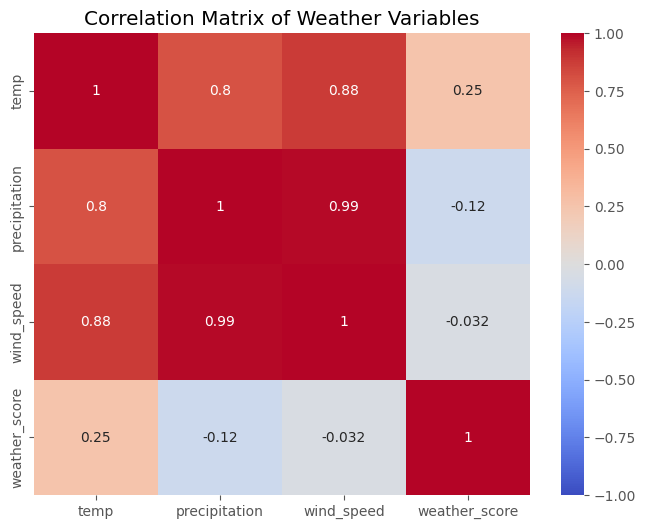

In [16]:
# Calculate correlation matrix for scores data
corr = scores[['temp', 'precipitation', 'wind_speed', 'weather_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

In [18]:
# Get current month (June)
current_month = 6

# Filter historical data for June
historical_june = historical[historical['month'] == current_month].groupby('city').mean()

# Prepare current data
current_comparison = current[['city', 'temp', 'precipitation', 'wind_speed']].set_index('city')

# Combine for comparison
comparison = historical_june.join(current_comparison, rsuffix='_current')

# Calculate differences
comparison['temp_diff'] = comparison['temp'] - comparison['avg_temp']
comparison['precip_diff'] = comparison['precipitation'] - comparison['precipitation']
comparison['wind_diff'] = comparison['wind_speed'] - comparison['wind_speed']

display(comparison)

,month,avg_temp,precipitation,wind_speed,temp,precipitation_current,wind_speed_current,temp_diff,precip_diff,wind_diff
city,,,,,,,,,,
London,6.0,20.0,75.0,15.0,26.49,0,4.80,6.49,0.0,0.0
New York,6.0,20.0,75.0,15.0,22.59,0,6.88,2.59,0.0,0.0
Paris,6.0,20.0,75.0,15.0,30.04,0,3.61,10.04,0.0,0.0
Tokyo,6.0,20.0,75.0,15.0,24.36,0,4.44,4.36,0.0,0.0


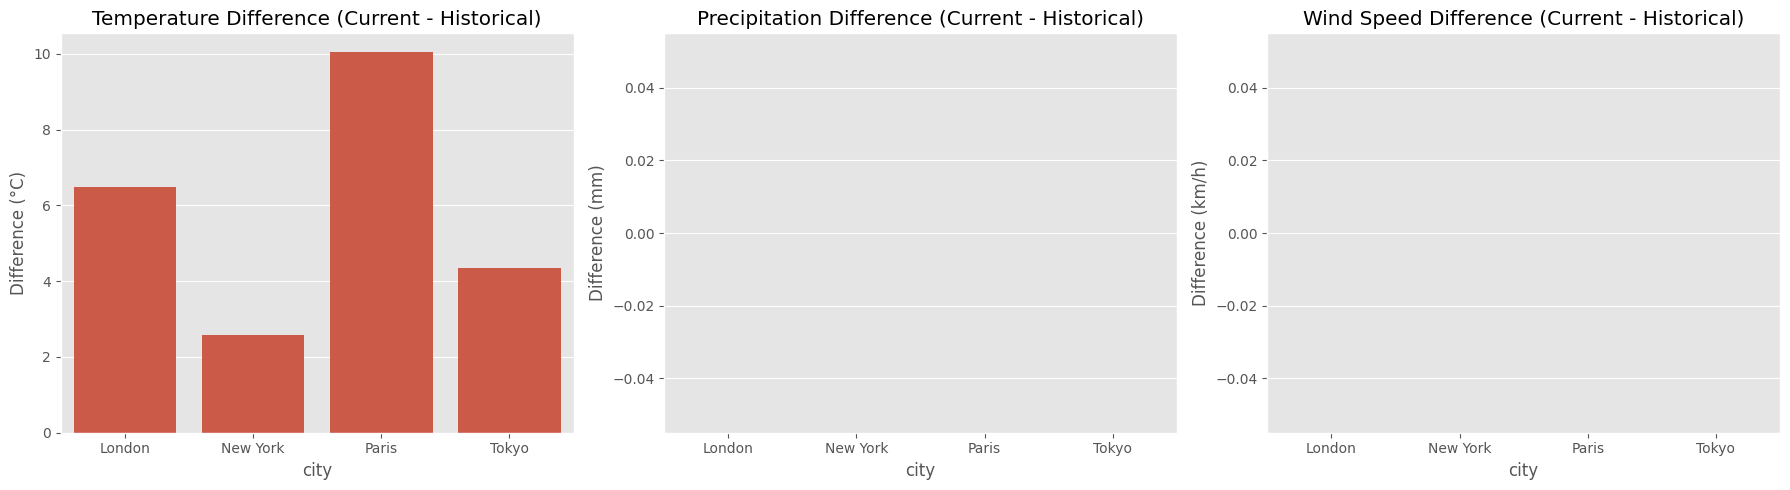

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature difference
sns.barplot(data=comparison.reset_index(), x='city', y='temp_diff', ax=axes[0])
axes[0].set_title('Temperature Difference (Current - Historical)')
axes[0].set_ylabel('Difference (°C)')

# Precipitation difference
sns.barplot(data=comparison.reset_index(), x='city', y='precip_diff', ax=axes[1])
axes[1].set_title('Precipitation Difference (Current - Historical)')
axes[1].set_ylabel('Difference (mm)')

# Wind speed difference
sns.barplot(data=comparison.reset_index(), x='city', y='wind_diff', ax=axes[2])
axes[2].set_title('Wind Speed Difference (Current - Historical)')
axes[2].set_ylabel('Difference (km/h)')

plt.tight_layout()
plt.show()

Best Travel Months by City:


,city,month,weather_score,temp,precipitation,wind_speed
5,London,6,0.62625,23.245,37.5,9.900
7,London,8,0.52500,24.000,85.0,17.000
8,London,9,0.50000,26.000,90.0,18.000
17,New York,6,0.59285,21.295,37.5,10.940
19,New York,8,0.52500,24.000,85.0,17.000
20,New York,9,0.50000,26.000,90.0,18.000
29,Paris,6,0.54345,25.020,37.5,9.305
31,Paris,8,0.52500,24.000,85.0,17.000
32,Paris,9,0.50000,26.000,90.0,18.000
41,Tokyo,6,0.64930,22.180,37.5,9.720


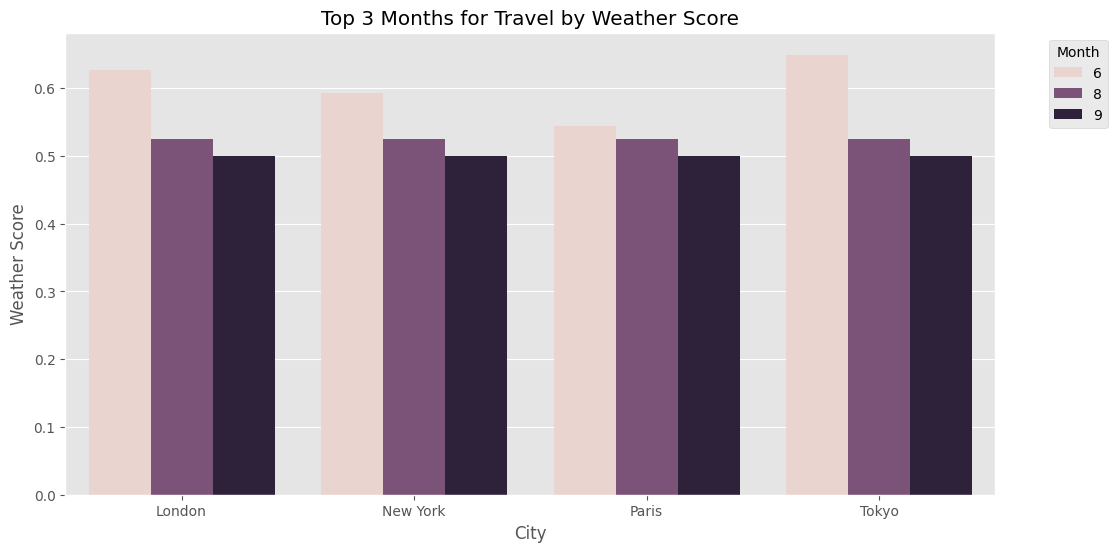

In [20]:
# Find top 3 months for each city by weather score
best_months = scores.loc[scores.groupby('city')['weather_score'].nlargest(3).index.get_level_values(1)]
best_months = best_months.sort_values(['city', 'weather_score'], ascending=[True, False])

print("Best Travel Months by City:")
display(best_months)

# Visualize best months
plt.figure(figsize=(12, 6))
sns.barplot(data=best_months, x='city', y='weather_score', hue='month')
plt.title('Top 3 Months for Travel by Weather Score')
plt.xlabel('City')
plt.ylabel('Weather Score')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()